In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Zoo.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [28]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


1. Analyse the data using the visualizations

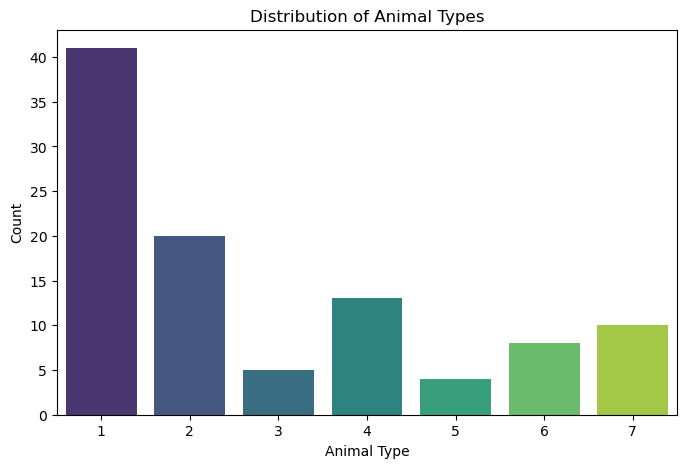

In [22]:
# Countplot for the target variable (animal types)
plt.figure(figsize=(8,5))
sns.countplot(x=df["type"], palette="viridis")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.title("Distribution of Animal Types")
plt.show()

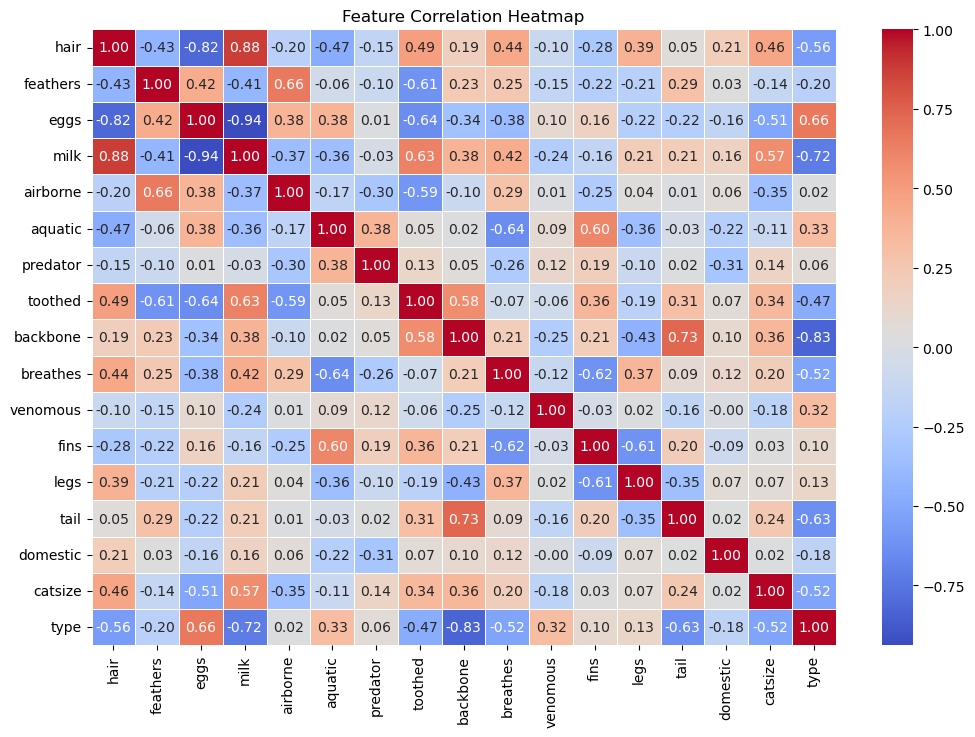

In [26]:
# Compute and visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=["animal name"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

2. Preprocess the data by handling missing values & Outliers, if any.

In [32]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

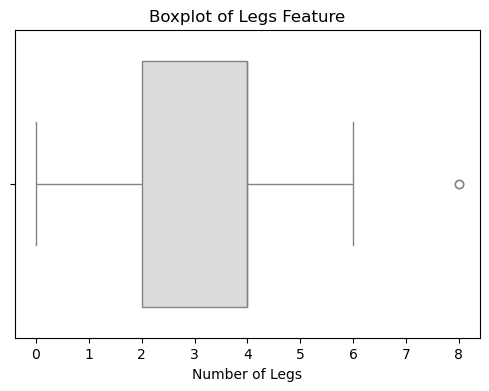

In [38]:
# Check for outliers in the numerical column 'legs' using a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["legs"], palette="coolwarm")
plt.xlabel("Number of Legs")
plt.title("Boxplot of Legs Feature")
plt.show()

Outliers in "legs":

The boxplot shows that "legs" has some outliers (e.g., animals with 0 or 8 legs). This is expected since some animals (like fish or octopuses) naturally have these values.

However, since this is a valid biological distinction, we may not need to remove them.

Feature Correlation:

Some features have strong correlations, such as "aquatic" and "fins" or "milk" and "hair", which makes sense biologically.

The correlation matrix helps understand which features contribute most to classification.

3. Split the dataset into training and testing sets (80% training, 20% testing).

In [42]:
# Drop the 'animal name' column as it's not useful for classification
df_cleaned = df.drop(columns=["animal name"])

In [44]:
# Split features and target variable
X = df_cleaned.drop(columns=["type"])  # Features
y = df_cleaned["type"]  # Target variable

In [48]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train_scaled.shape

(80, 16)

In [56]:
 X_test_scaled.shape

(21, 16)

4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

5. Choose an appropriate distance metric and value for K.

In [63]:
# Choose a value for K (e.g., 5) and Euclidean distance metric
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [65]:
# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [81]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [83]:
classification_rep = classification_report(y_test, y_pred)

In [71]:
accuracy

1.0

In [73]:
precision

1.0

In [75]:
recall

1.0

In [77]:
f1

1.0

In [85]:
classification_rep

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         8\n           2       1.00      1.00      1.00         4\n           3       1.00      1.00      1.00         1\n           4       1.00      1.00      1.00         3\n           5       1.00      1.00      1.00         1\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         2\n\n    accuracy                           1.00        21\n   macro avg       1.00      1.00      1.00        21\nweighted avg       1.00      1.00      1.00        21\n'

7. Visualize the decision boundaries of the classifier.

In [95]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [97]:
# Train KNN on the reduced data
knn_pca = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [99]:
# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

In [103]:
# Predict for each point in the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

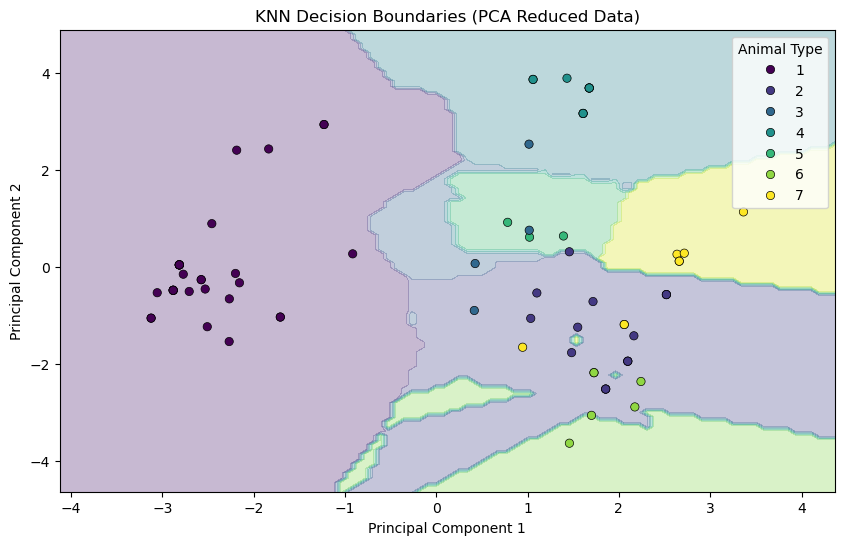

In [105]:
# Plot decision boundaries
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="viridis", edgecolor="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Decision Boundaries (PCA Reduced Data)")
plt.legend(title="Animal Type")
plt.show()

Interview Questions:
1. What are the key hyperparameters in KNN?

Number of Neighbors (K): Determines how many nearest neighbors are considered for classification.
                                                                             
Distance Metric: Defines how distances are measured (e.g., Euclidean, Manhattan).
                                                                             
Weighting Strategy: Whether all neighbors contribute equally or closer ones are weighted more.

2. What distance metrics can be used in KNN?


Euclidean Distance (default, good for continuous data)

Manhattan Distance (better for grid-based structures)

Minkowski Distance (generalization of Euclidean & Manhattan)

Hamming Distance (for categorical data)

Cosine Similarity (for text or high-dimensional data)